In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6)
import re
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
data = pd.read_csv("/Users/Johanna/Documents/SIMPLON DATA IA/IA/ML PROJET/PROJET SELOGER/csv/name_csv_Paris_bd.csv")
data.info()
#data.shape
df = pd.read_csv("/Users/Johanna/Documents/SIMPLON DATA IA/IA/ML PROJET/PROJET SELOGER/csv/name_csv_Lyon_bd.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 29 columns):
bd_style            239 non-null object
bd_localisation     239 non-null object
bd_nb_chambre       239 non-null object
bd_nb_piece         239 non-null object
bd_prix             239 non-null object
bd_paragraphe       239 non-null object
bd_salle_d_eau      239 non-null object
bd_salle_de_bain    239 non-null object
bd_toilette         239 non-null object
bd_annee            239 non-null object
bd_etage            239 non-null object
bd_hauteur          185 non-null object
bd_ascenseur        239 non-null object
bd_vue              239 non-null object
bd_cave             239 non-null object
bd_parking          179 non-null object
bd_chemine          239 non-null object
bd_exposition       239 non-null object
bd_balcon           178 non-null object
bd_terrasse         149 non-null object
bd_gardien          239 non-null object
bd_travaux          194 non-null object
bd_neuf        

In [3]:
data.head()

,bd_style,bd_localisation,bd_nb_chambre,bd_nb_piece,bd_prix,bd_paragraphe,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,...,bd_terrasse,bd_gardien,bd_travaux,bd_neuf,bd_parquet,bd_cuisine,bd_vis_a_vis,bd_jardin,bd_piscine,bd_taille
0,Appartement,Paris 16ème,1 Chambre,5 Pièces,6 300 000 €\nLes honoraires sont à la charge d...,Paris 16ème - Palais de Tokyo. Rare. Vue Tour ...,Non reference,1 Salle de bain,Non reference,Année de construction 1900,...,Terrasse,Non reference,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['230 M²']
1,Appartement,Paris 16ème,5 Chambres,10 Pièces,3 000 000 € à 10 000 000 €\nLes honoraires son...,Paris 16ème - Jardin du Ranelagh. Dans un hôte...,1 Salle d'eau,3 Salles de bain,Non reference,Non reference,...,NaN,Non reference,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['333 M²']
2,Appartement,Paris 16ème,4 Chambres,6 Pièces,2 995 000 €\nLes honoraires sont à la charge d...,TERRASSE 80 M2 A proximité de la place du Troc...,2 Salles d'eau,2 Salles de bain,3 Toilettes,Année de construction 1976,...,Terrasse,Gardien,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['185 M²']
3,Appartement,Paris 16ème,4 Chambres,6 Pièces,2 980 000 €\nLes honoraires sont à la charge d...,Paris 16 - EXCLUSIVITÉ - FLANDRIN - APPARTEMEN...,Non reference,Non reference,Non reference,Année de construction 1914,...,NaN,Non reference,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['232 M²']
4,Appartement,Paris 16ème,3 Chambres,5 Pièces,1 800 000 €\nHonoraires TTC inclus à la charge...,Victor Hugo - Appartement trois chambres - 6èm...,Non reference,2 Salles de bain,2 Toilettes,Année de construction 1905,...,NaN,Gardien,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,['123 M²']


In [4]:
#df.bd_style.unique() 
#df.bd_nb_chambre.unique()       
#df.bd_nb_piece.unique()         
#df.bd_prix.unique() #            
#df.bd_paragraphe.unique()       
#df.bd_salle_d_eau.unique() #     
#df.bd_salle_de_bain.unique()    
#df.bd_toilette.unique()         
#df.bd_annee.unique() #            
#df.bd_etage.unique()  ##          
#df.bd_ascenseur.unique()  #     
#df.bd_balcon.unique()  ##          
#df.bd_cave.unique() #           
#df.bd_chemine.unique()  ##         
#df.bd_cuisine.unique() ##          
#df.bd_exposition.unique() ##  VIDE     
#df.bd_gardien.unique()          
#df.bd_hauteur.unique()          
#df.bd_jardin.unique() # VIDE        
#df.bd_localisation.unique() #     
#df.bd_neuf.unique() ##   VIDE           
#df.bd_parking.unique()          
#df.bd_parquet.unique()          
#df.bd_piscine.unique()  #       
#df.bd_taille.unique()           
#df.bd_terrasse.unique()         
#df.bd_travaux.unique() VIDE          
#df.bd_vis_a_vis.unique() # VIDE Mais piscine       
#df.bd_vue.unique() #              

In [5]:
#data.bd_style.unique() 
#data.bd_nb_chambre.unique()       
#data.bd_nb_piece.unique() #        
#data.bd_prix.unique()  ##            
#data.bd_paragraphe.unique()       
#data.bd_salle_d_eau.unique()      
#data.bd_salle_de_bain.unique() #    
#data.bd_toilette.unique()  #        
#data.bd_annee.unique()  #           
#data.bd_etage.unique() ##            
#data.bd_ascenseur.unique()  #       
#data.bd_balcon.unique()           
#data.bd_cave.unique()             
#data.bd_chemine.unique()          
#data.bd_cuisine.unique()          
#data.bd_exposition.unique()  # VIDE   
#data.bd_gardien.unique()          
#data.bd_hauteur.unique()  #         
#data.bd_jardin.unique() VIDE          
#data.bd_localisation.unique()  #    
#data.bd_neuf.unique()   #Parquet   VIDE         
#data.bd_parking.unique()          
#data.bd_parquet.unique()  # Piscine        
#data.bd_piscine.unique()          
#data.bd_taille.unique()  # Belle vue         
#data.bd_terrasse.unique()  #        
#data.bd_travaux.unique()  # Parking    VIDE    
data.bd_vis_a_vis.unique()   ##   Terrasse    VIDE
#data.bd_vue.unique()  

array(['Non reference', nan, 'Terrasse'], dtype=object)

In [6]:
# Colonne avec réponse décallée - TEST
df_change = df[df.bd_nb_chambre == 'Lyon 6ème'].copy()

df_change.bd_salle_d_eau.iloc[0:12] = df_change.loc[:,"bd_salle_de_bain"]
df_change.bd_toilette.iloc[0:12] = df_change.loc[:,"bd_annee"]
df_change.bd_annee.iloc[0:12] = df_change.loc[:,"bd_etage"]
df_change.bd_etage.iloc[0:12] = df_change.loc[:,"bd_ascenseur"]
df_change.bd_ascenseur.iloc[0:12] = df_change.loc[:,"bd_cave"]
df_change.bd_taille.iloc[0:12] = df_change.loc[:,"bd_vue"]
df_change.bd_vue.iloc[0:12] = df_change.loc[:,"bd_chemine"]
df_change.bd_cave.iloc[0:12] = df_change.loc[:,"bd_cuisine"]
df_change.bd_parking.iloc[0:12] = df_change.loc[:,"bd_exposition"]
df_change.bd_parquet.iloc[0:12] = df_change.loc[:,"bd_piscine"]
df_change.bd_piscine.iloc[0:12] = df_change.loc[:,"bd_vis_a_vis"]
df_change.bd_hauteur.iloc[0:12] = df_change.loc[:,"bd_balcon"]
df_change.bd_gardien.iloc[0:12] = df_change.loc[:,"bd_neuf"]
df_change.bd_localisation.iloc[0:12] = df_change.loc[:,"bd_nb_chambre"]
df_change.bd_nb_chambre.iloc[0:12] = df_change.loc[:,"bd_nb_piece"]
df_change.bd_nb_piece.iloc[0:12] = df_change.loc[:,"bd_prix"]
df_change.bd_prix.iloc[0:12] = df_change.loc[:,"bd_paragraphe"]

#df_change.loc[df_change.bd_nb_chambre == 'Lyon 6ème']
df_change.iloc[0:12]

,bd_style,bd_nb_chambre,bd_nb_piece,bd_prix,bd_paragraphe,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,bd_etage,...,bd_localisation,bd_neuf,bd_parking,bd_parquet,bd_piscine,bd_taille,bd_terrasse,bd_travaux,bd_vis_a_vis,bd_vue
27,Appartement,3 Chambres,8 Pièces,2 800 000 €\nLes honoraires sont à la charge d...,2 800 000 €\nLes honoraires sont à la charge d...,1 Salle d'eau,1 Salle d'eau,3 Toilettes,Non reference,Au 2ème étage,...,Lyon 6ème,Gardien,Parking,Parquet,Non reference,['313 M²'],Non reference,Non reference,Non reference,Belle vue
28,Appartement,2 Chambres,3 Pièces,1 350 000 €\nLes honoraires sont à la charge d...,1 350 000 €\nLes honoraires sont à la charge d...,1 Salle d'eau,1 Salle d'eau,2 Toilettes,Année de construction 2017,Au 5ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Piscine,['107 M²'],Non reference,Non reference,Piscine,Belle vue
29,Appartement,3 Chambres,4 Pièces,649 000 €\nLes honoraires sont à la charge du ...,649 000 €\nLes honoraires sont à la charge du ...,1 Salle d'eau,1 Salle d'eau,1 Toilette,Année de construction 1890,Au 2ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['120 M²'],Non reference,Non reference,Non reference,Non reference
30,Appartement,3 Chambres,4 Pièces,558 000 €,558 000 €,Non reference,Non reference,1 Toilette,Non reference,Au 2ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['93 M²'],Non reference,Non reference,Non reference,Non reference
31,Appartement,3 Chambres,5 Pièces,1 080 000 €\nLes honoraires sont à la charge d...,1 080 000 €\nLes honoraires sont à la charge d...,1 Salle d'eau,1 Salle d'eau,1 Toilette,Non reference,Au 3ème étage,...,Lyon 6ème,Non reference,Parking,Parquet,Non reference,['142 M²'],Non reference,Non reference,Non reference,Non reference
32,Appartement,4 Chambres,6 Pièces,1 560 000 €\nLes honoraires TTC sont inclus à ...,1 560 000 €\nLes honoraires TTC sont inclus à ...,2 Salles d'eau,2 Salles d'eau,3 Toilettes,Année de construction 1952,Au 1er étage,...,Lyon 6ème,Gardien,Non reference,Non reference,Non reference,['194 M²'],Non reference,Non reference,Non reference,Belle vue
33,Appartement,2 Chambres,3 Pièces,565 000 €\nLes honoraires sont à la charge du ...,565 000 €\nLes honoraires sont à la charge du ...,Non reference,Non reference,1 Toilette,Année de construction 1950,Au 7ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['80 M²'],Non reference,Non reference,Non reference,Belle vue
34,Villa,4 Chambres,6 Pièces,2 250 000 €\nLes honoraires sont à la charge d...,2 250 000 €\nLes honoraires sont à la charge d...,Non reference,Non reference,3 Toilettes,Année de construction 1990,Non reference,...,Lyon 6ème,Non reference,Parking,Non reference,Piscine,['300 M²'],Non reference,Non reference,Piscine,Non reference
35,Appartement,2 Chambres,3 Pièces,570 000 €\nLes honoraires sont à la charge du ...,570 000 €\nLes honoraires sont à la charge du ...,Non reference,Non reference,1 Toilette,Non reference,Au 2ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['68 M²'],Non reference,Non reference,Non reference,Non reference
36,Appartement,4 Chambres,5 Pièces,1 890 000 €\nLes honoraires sont à la charge d...,1 890 000 €\nLes honoraires sont à la charge d...,2 Salles d'eau,2 Salles d'eau,3 Toilettes,Année de construction 1994,Au 7ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['200 M²'],Non reference,Non reference,Non reference,Belle vue


In [7]:
df.iloc[27:38]

,bd_style,bd_nb_chambre,bd_nb_piece,bd_prix,bd_paragraphe,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,bd_etage,...,bd_localisation,bd_neuf,bd_parking,bd_parquet,bd_piscine,bd_taille,bd_terrasse,bd_travaux,bd_vis_a_vis,bd_vue
27,Appartement,Lyon 6ème,3 Chambres,8 Pièces,2 800 000 €\nLes honoraires sont à la charge d...,RARE !! Lyon 6 Vue Fourvière !! Quand le raffi...,1 Salle d'eau,2 Salles de bain,3 Toilettes,Non reference,...,Non reference,Gardien,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['313 M²']
28,Appartement,Lyon 6ème,2 Chambres,3 Pièces,1 350 000 €\nLes honoraires sont à la charge d...,EXCLUSIVITÉ Dufossé Immobilier vous propose ce...,1 Salle d'eau,1 Salle de bain,2 Toilettes,Année de construction 2017,...,Terrasse,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Piscine,['107 M²']
29,Appartement,Lyon 6ème,3 Chambres,4 Pièces,649 000 €\nLes honoraires sont à la charge du ...,"Entre Massena et Foch, vous serez séduits par ...",1 Salle d'eau,1 Salle de bain,1 Toilette,Année de construction 1890,...,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,['120 M²']
30,Appartement,Lyon 6ème,3 Chambres,4 Pièces,558 000 €,"METROPOLE Immobilier vous propose ce beau T4, ...",Non reference,2 Salles de bain,1 Toilette,Non reference,...,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,['93 M²']
31,Appartement,Lyon 6ème,3 Chambres,5 Pièces,1 080 000 €\nLes honoraires sont à la charge d...,Très bel appartement en étage élevé avec ascen...,1 Salle d'eau,1 Salle de bain,1 Toilette,Non reference,...,Non reference,Non reference,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['142 M²']
32,Appartement,Lyon 6ème,4 Chambres,6 Pièces,1 560 000 €\nLes honoraires TTC sont inclus à ...,UNIQUE en ce moment sur le marché lyonnais: ap...,2 Salles d'eau,1 Salle de bain,3 Toilettes,Année de construction 1952,...,Non reference,Gardien,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,['194 M²']
33,Appartement,Lyon 6ème,2 Chambres,3 Pièces,565 000 €\nLes honoraires sont à la charge du ...,LYON 6 - entre Foch et Parc de la Tête d'Or - ...,Non reference,1 Salle de bain,1 Toilette,Année de construction 1950,...,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,['80 M²']
34,Villa,Lyon 6ème,4 Chambres,6 Pièces,2 250 000 €\nLes honoraires sont à la charge d...,Dufossé immobilier vous propose cette villa ex...,Non reference,2 Salles de bain,3 Toilettes,Année de construction 1990,...,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Piscine,['300 M²']
35,Appartement,Lyon 6ème,2 Chambres,3 Pièces,570 000 €\nLes honoraires sont à la charge du ...,Bel appartement de 69m² situé en plein coeur d...,Non reference,1 Salle de bain,1 Toilette,Non reference,...,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,['68 M²']
36,Appartement,Lyon 6ème,4 Chambres,5 Pièces,1 890 000 €\nLes honoraires sont à la charge d...,"Dufossé immobilier vous propose Croix Rousse, ...",2 Salles d'eau,1 Salle de bain,3 Toilettes,Année de construction 1994,...,Terrasse,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,['200 M²']


In [8]:
# Colonne avec réponse décallée - CORRECTION

df.bd_salle_d_eau.iloc[27:38] = df.bd_salle_de_bain.iloc[27:38]
df.bd_toilette.iloc[27:38] = df.bd_annee.iloc[27:38]
df.bd_annee.iloc[27:38] = df.bd_etage.iloc[27:38]
df.bd_etage.iloc[27:38] = df.bd_ascenseur.iloc[27:38]
df.bd_ascenseur.iloc[27:38] = df.bd_cave.iloc[27:38]
df.bd_taille.iloc[27:38] = df.bd_vue.iloc[27:38]
df.bd_vue.iloc[27:38] = df.bd_chemine.iloc[27:38]
df.bd_cave.iloc[27:38] = df.bd_cuisine.iloc[27:38]
df.bd_parking.iloc[27:38] = df.bd_exposition.iloc[27:38]
df.bd_parquet.iloc[27:38] = df.bd_piscine.iloc[27:38]
df.bd_piscine.iloc[27:38] = df.bd_vis_a_vis.iloc[27:38]
df.bd_hauteur.iloc[27:38] = df.bd_balcon.iloc[27:38]
df.bd_gardien.iloc[27:38] = df.bd_neuf.iloc[27:38]
df.bd_localisation.iloc[27:38] = df.bd_nb_chambre.iloc[27:38]
df.bd_nb_chambre.iloc[27:38] = df.bd_nb_piece.iloc[27:38]
df.bd_nb_piece.iloc[27:38] = df.bd_prix.iloc[27:38]
df.bd_prix.iloc[27:38] = df.bd_paragraphe.iloc[27:38]

#df.loc[df_change.bd_nb_chambre == 'Lyon 6ème']
df.iloc[27:38]

,bd_style,bd_nb_chambre,bd_nb_piece,bd_prix,bd_paragraphe,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,bd_etage,...,bd_localisation,bd_neuf,bd_parking,bd_parquet,bd_piscine,bd_taille,bd_terrasse,bd_travaux,bd_vis_a_vis,bd_vue
27,Appartement,3 Chambres,8 Pièces,2 800 000 €\nLes honoraires sont à la charge d...,2 800 000 €\nLes honoraires sont à la charge d...,1 Salle d'eau,1 Salle d'eau,3 Toilettes,Non reference,Au 2ème étage,...,Lyon 6ème,Gardien,Parking,Parquet,Non reference,['313 M²'],Non reference,Non reference,Non reference,Belle vue
28,Appartement,2 Chambres,3 Pièces,1 350 000 €\nLes honoraires sont à la charge d...,1 350 000 €\nLes honoraires sont à la charge d...,1 Salle d'eau,1 Salle d'eau,2 Toilettes,Année de construction 2017,Au 5ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Piscine,['107 M²'],Non reference,Non reference,Piscine,Belle vue
29,Appartement,3 Chambres,4 Pièces,649 000 €\nLes honoraires sont à la charge du ...,649 000 €\nLes honoraires sont à la charge du ...,1 Salle d'eau,1 Salle d'eau,1 Toilette,Année de construction 1890,Au 2ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['120 M²'],Non reference,Non reference,Non reference,Non reference
30,Appartement,3 Chambres,4 Pièces,558 000 €,558 000 €,Non reference,Non reference,1 Toilette,Non reference,Au 2ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['93 M²'],Non reference,Non reference,Non reference,Non reference
31,Appartement,3 Chambres,5 Pièces,1 080 000 €\nLes honoraires sont à la charge d...,1 080 000 €\nLes honoraires sont à la charge d...,1 Salle d'eau,1 Salle d'eau,1 Toilette,Non reference,Au 3ème étage,...,Lyon 6ème,Non reference,Parking,Parquet,Non reference,['142 M²'],Non reference,Non reference,Non reference,Non reference
32,Appartement,4 Chambres,6 Pièces,1 560 000 €\nLes honoraires TTC sont inclus à ...,1 560 000 €\nLes honoraires TTC sont inclus à ...,2 Salles d'eau,2 Salles d'eau,3 Toilettes,Année de construction 1952,Au 1er étage,...,Lyon 6ème,Gardien,Non reference,Non reference,Non reference,['194 M²'],Non reference,Non reference,Non reference,Belle vue
33,Appartement,2 Chambres,3 Pièces,565 000 €\nLes honoraires sont à la charge du ...,565 000 €\nLes honoraires sont à la charge du ...,Non reference,Non reference,1 Toilette,Année de construction 1950,Au 7ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['80 M²'],Non reference,Non reference,Non reference,Belle vue
34,Villa,4 Chambres,6 Pièces,2 250 000 €\nLes honoraires sont à la charge d...,2 250 000 €\nLes honoraires sont à la charge d...,Non reference,Non reference,3 Toilettes,Année de construction 1990,Non reference,...,Lyon 6ème,Non reference,Parking,Non reference,Piscine,['300 M²'],Non reference,Non reference,Piscine,Non reference
35,Appartement,2 Chambres,3 Pièces,570 000 €\nLes honoraires sont à la charge du ...,570 000 €\nLes honoraires sont à la charge du ...,Non reference,Non reference,1 Toilette,Non reference,Au 2ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['68 M²'],Non reference,Non reference,Non reference,Non reference
36,Appartement,4 Chambres,5 Pièces,1 890 000 €\nLes honoraires sont à la charge d...,1 890 000 €\nLes honoraires sont à la charge d...,2 Salles d'eau,2 Salles d'eau,3 Toilettes,Année de construction 1994,Au 7ème étage,...,Lyon 6ème,Non reference,Non reference,Non reference,Non reference,['200 M²'],Non reference,Non reference,Non reference,Belle vue


In [9]:
df[df.bd_etage == 'Au moins 1 toilette séparée']
df.bd_etage.iloc[22] = "Non reference"
df.bd_etage.iloc[24] = "Non reference"


In [10]:
df[df.bd_balcon == 'Bâtiment de 5 étages']
df.bd_balcon.iloc[27] = "Non reference"

df[df.bd_balcon == 'Bâtiment de 6 étages']
df.bd_balcon.iloc[28] = df.bd_jardin.iloc[28]
df.bd_jardin.iloc[28] = "Non reference"

df[df.bd_balcon == 'Bâtiment de 4 étages']
df.bd_balcon.iloc[29] = "Non reference"
df.bd_balcon.iloc[30] = "Non reference"

df[df.bd_balcon == 'Bâtiment de 3 étages']
df.bd_balcon.iloc[32] = "Non reference"


df[df.bd_balcon == 'Bâtiment de 7 étages']
df.bd_balcon.iloc[33] = "Non reference"
df.bd_balcon.iloc[36] = "Non reference"
df.bd_balcon.iloc[37] = df.bd_jardin.iloc[37]


#df.iloc[33]

In [11]:
df[df.bd_chemine == 'Belle vue']
df.bd_chemine.iloc[27] = "Non reference"
df.bd_chemine.iloc[28] = "Non reference"
df.bd_chemine.iloc[32] = "Non reference"
df.bd_chemine.iloc[33] = "Non reference"
df.bd_chemine.iloc[36] = "Non reference"
#27,28,32,33,36

In [12]:
df[df.bd_cuisine == 'Cave']
df.bd_cuisine.iloc[27] = "Non reference"
df.bd_cuisine.iloc[31] = "Non reference"
df.bd_cuisine.iloc[33] = "Non reference"
df.bd_cuisine.iloc[35] = "Non reference"
df.bd_cuisine.iloc[37] = "Non reference"

df[df.bd_cuisine == 'Cave de 2 m²']
df.bd_cuisine.iloc[29] = "Non reference"

df[df.bd_cuisine == 'Cave de 17,5 m²']
df.bd_cuisine.iloc[32] = "Non reference"

#df.iloc[32]

#'Cave', 'Cave de 2 m²', 'Cave de 17,5 m²'
#27,31,33,35,37

In [13]:
df[df.bd_exposition == 'Parking']
df.bd_exposition.iloc[27] = "Non reference"
df.bd_exposition.iloc[31] = "Non reference"
df.bd_exposition.iloc[34] = "Non reference"
df.bd_exposition.iloc[37] = "Non reference"
#df.iloc[31]
#27,31,34,37

In [14]:
df[df.bd_jardin == 'Balcon']
df.bd_jardin.iloc[37] = "Non reference"

df.iloc[37]

bd_style                                                  Appartement
bd_nb_chambre                                              3 Chambres
bd_nb_piece                                                  4 Pièces
bd_prix             590 000 €\nLes honoraires sont à la charge du ...
bd_paragraphe       590 000 €\nLes honoraires sont à la charge du ...
bd_salle_d_eau                                          Non reference
bd_salle_de_bain                                        Non reference
bd_toilette                                                1 Toilette
bd_annee                                   Année de construction 1954
bd_etage                                                 Au 1er étage
bd_ascenseur                                                Ascenseur
bd_balcon                                                      Balcon
bd_cave                                                          Cave
bd_chemine                                              Non reference
bd_cuisine          

In [15]:
df[df.bd_neuf == 'Gardien']
df.bd_neuf.iloc[27] = "Non reference"
df.bd_neuf.iloc[32] = "Non reference"

In [16]:
# Colonne avec réponse décallée - TEST
data_change = data[data.bd_terrasse == 'Paris 16ème'].copy()
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_prix"] = data_change.loc[:,"bd_nb_piece"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_nb_piece"] = data_change.loc[:,"bd_nb_chambre"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_nb_chambre"] = data_change.loc[:,"bd_localisation"]
#
#
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_vue"] = data_change.loc[:,"bd_taille"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_taille"] = data_change.loc[:,"bd_cuisine"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_parquet"] = data_change.loc[:,"bd_neuf"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_gardien"] = data_change.loc[:,"bd_chemine"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_cave"] = data_change.loc[:,"bd_ascenseur"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_ascenseur"] = data_change.loc[:,"bd_etage"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_etage"] = data_change.loc[:,"bd_annee"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_annee"] = data_change.loc[:,"bd_toilette"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_toilette"] = data_change.loc[:,"bd_salle_de_bain"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_salle_de_bain"] = data_change.loc[:,"bd_salle_d_eau"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_salle_d_eau"] = data_change.loc[:,"bd_paragraphe"]
#
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"Balcon"] = data_change.loc[:,"bd_hauteur"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_hauteur"] = data_change.loc[:,"bd_exposition"]
#
#
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_parking"] = data_change.loc[:,"bd_travaux"]
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_localisation"] = data_change.loc[:,"bd_terrasse"]
#
#
#
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_neuf"] = "Non reference"
data_change.bd_cuisine.loc[data_change.bd_terrasse == 'Paris 16ème'] = "Non reference"
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_travaux"] = "Non reference"
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_paragraphe"] = "Non reference"
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_chemine"] = "Non reference"
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_exposition"] = "Non reference"
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_terrasse"] = "Non reference"
#
data_change.loc[data_change.bd_terrasse == 'Paris 16ème',"bd_terrasse"] = data_change.loc[:,"bd_vis_a_vis"]




data_change
# data_change[data_change.bd_terrasse == 'Paris 16ème']

,bd_style,bd_localisation,bd_nb_chambre,bd_nb_piece,bd_prix,bd_paragraphe,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,...,bd_gardien,bd_travaux,bd_neuf,bd_parquet,bd_cuisine,bd_vis_a_vis,bd_jardin,bd_piscine,bd_taille,Balcon
52,Appartement,Paris 16ème,4 Chambres,7 Pièces,3 095 000 €\nLes honoraires sont à la charge d...,Non reference,Non reference,2 Salles de bain,2 Toilettes,Année de construction 1895,...,Gardien,Non reference,Non reference,Parquet,Non reference,NaN,Non reference,Non reference,['240 M²'],NaN
53,Appartement,Paris 16ème,2 Chambres,4 Pièces,2 050 000 €\nLes honoraires sont à la charge d...,Non reference,Non reference,2 Salles de bain,1 Toilette,Année de construction 1920,...,Non reference,Non reference,Non reference,Parquet,Non reference,NaN,Non reference,Non reference,[],NaN
54,Appartement,Paris 16ème,3 Chambres,4 Pièces,1 995 000 €\nLes honoraires sont à la charge d...,Non reference,1 Salle d'eau,2 Salles de bain,1 Toilette,Année de construction 1905,...,Gardien,Non reference,Non reference,Parquet,Non reference,NaN,Non reference,Non reference,[],NaN
55,Appartement,Paris 16ème,4 Chambres,8 Pièces,6 360 000 €\nLes honoraires sont à la charge d...,Non reference,Non reference,Non reference,Non reference,Année de construction 1850,...,Non reference,Non reference,Non reference,Parquet,Non reference,NaN,Non reference,Non reference,[],Non reference
56,Appartement,Paris 16ème,3 Chambres,4 Pièces,2 200 000 €\nLes honoraires sont à la charge d...,Non reference,1 Salle d'eau,1 Salle de bain,2 Toilettes,Année de construction 1976,...,Gardien,Non reference,Non reference,Non reference,Non reference,NaN,Non reference,Non reference,['153 M²'],Balcon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Appartement,Paris 16ème,6 Chambres,7 Pièces,4 672 500 €\nHonoraires TTC inclus à la charge...,Non reference,2 Salles d'eau,2 Salles de bain,Non reference,Non reference,...,Non reference,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['293 M²'],Balcon
235,Appartement,Paris 16ème,3 Chambres,4 Pièces,915 000 €\nHonoraires TTC inclus à la charge d...,Non reference,Non reference,1 Salle de bain,1 Toilette,Année de construction 1900,...,Gardien,Non reference,Non reference,Parquet,Non reference,NaN,Non reference,Non reference,['74 M²'],NaN
236,Appartement,Paris 16ème,6 Chambres,9 Pièces,6 825 000 €\nHonoraires TTC inclus à la charge...,Non reference,Non reference,3 Salles de bain,2 Toilettes,Année de construction 1900,...,Gardien,Non reference,Non reference,Non reference,Non reference,NaN,Non reference,Non reference,['425 M²'],Non reference
237,Appartement,Paris 16ème,1 Chambre,2 Pièces,686 000 €\nLes honoraires sont à la charge du ...,Non reference,Non reference,Non reference,2 Toilettes,Non reference,...,Gardien,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['45 M²'],NaN


In [17]:
# Colonne avec réponse décallée - CORRECTION
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_prix"] = data.loc[:,"bd_nb_piece"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_nb_piece"] = data.loc[:,"bd_nb_chambre"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_nb_chambre"] = data.loc[:,"bd_localisation"]

data.loc[data.bd_terrasse == 'Paris 16ème',"bd_vue"] = data.loc[:,"bd_taille"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_taille"] = data.loc[:,"bd_cuisine"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_parquet"] = data.loc[:,"bd_neuf"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_gardien"] = data.loc[:,"bd_chemine"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_cave"] = data.loc[:,"bd_ascenseur"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_ascenseur"] = data.loc[:,"bd_etage"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_etage"] = data.loc[:,"bd_annee"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_annee"] = data.loc[:,"bd_toilette"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_toilette"] = data.loc[:,"bd_salle_de_bain"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_salle_de_bain"] = data.loc[:,"bd_salle_d_eau"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_salle_d_eau"] = data.loc[:,"bd_paragraphe"]

data.loc[data.bd_terrasse == 'Paris 16ème',"Balcon"] = data.loc[:,"bd_hauteur"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_hauteur"] = data.loc[:,"bd_exposition"]

data.loc[data.bd_terrasse == 'Paris 16ème',"bd_parking"] = data.loc[:,"bd_travaux"]
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_localisation"] = data.loc[:,"bd_terrasse"]

data.loc[data.bd_terrasse == 'Paris 16ème',"bd_neuf"] = "Non reference"
data.bd_cuisine.loc[data.bd_terrasse == 'Paris 16ème'] = "Non reference"
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_travaux"] = "Non reference"
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_paragraphe"] = "Non reference"
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_chemine"] = "Non reference"
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_exposition"] = "Non reference"
data.loc[data.bd_terrasse == 'Paris 16ème',"bd_terrasse"] = "Non reference"

data.loc[data.bd_terrasse == 'Paris 16ème',"bd_terrasse"] = data.loc[:,"bd_vis_a_vis"]




data
#data[data.bd_terrasse == 'Paris 16ème']

,bd_style,bd_localisation,bd_nb_chambre,bd_nb_piece,bd_prix,bd_paragraphe,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,...,bd_gardien,bd_travaux,bd_neuf,bd_parquet,bd_cuisine,bd_vis_a_vis,bd_jardin,bd_piscine,bd_taille,Balcon
0,Appartement,Paris 16ème,1 Chambre,5 Pièces,6 300 000 €\nLes honoraires sont à la charge d...,Paris 16ème - Palais de Tokyo. Rare. Vue Tour ...,Non reference,1 Salle de bain,Non reference,Année de construction 1900,...,Non reference,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['230 M²'],NaN
1,Appartement,Paris 16ème,5 Chambres,10 Pièces,3 000 000 € à 10 000 000 €\nLes honoraires son...,Paris 16ème - Jardin du Ranelagh. Dans un hôte...,1 Salle d'eau,3 Salles de bain,Non reference,Non reference,...,Non reference,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['333 M²'],NaN
2,Appartement,Paris 16ème,4 Chambres,6 Pièces,2 995 000 €\nLes honoraires sont à la charge d...,TERRASSE 80 M2 A proximité de la place du Troc...,2 Salles d'eau,2 Salles de bain,3 Toilettes,Année de construction 1976,...,Gardien,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['185 M²'],NaN
3,Appartement,Paris 16ème,4 Chambres,6 Pièces,2 980 000 €\nLes honoraires sont à la charge d...,Paris 16 - EXCLUSIVITÉ - FLANDRIN - APPARTEMEN...,Non reference,Non reference,Non reference,Année de construction 1914,...,Non reference,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['232 M²'],NaN
4,Appartement,Paris 16ème,3 Chambres,5 Pièces,1 800 000 €\nHonoraires TTC inclus à la charge...,Victor Hugo - Appartement trois chambres - 6èm...,Non reference,2 Salles de bain,2 Toilettes,Année de construction 1905,...,Gardien,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,Non reference,['123 M²'],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Appartement,Paris 16ème,6 Chambres,7 Pièces,4 672 500 €\nHonoraires TTC inclus à la charge...,Non reference,2 Salles d'eau,2 Salles de bain,Non reference,Non reference,...,Non reference,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['293 M²'],Balcon
235,Appartement,Paris 16ème,3 Chambres,4 Pièces,915 000 €\nHonoraires TTC inclus à la charge d...,Non reference,Non reference,1 Salle de bain,1 Toilette,Année de construction 1900,...,Gardien,Non reference,Non reference,Parquet,Non reference,NaN,Non reference,Non reference,['74 M²'],NaN
236,Appartement,Paris 16ème,6 Chambres,9 Pièces,6 825 000 €\nHonoraires TTC inclus à la charge...,Non reference,Non reference,3 Salles de bain,2 Toilettes,Année de construction 1900,...,Gardien,Non reference,Non reference,Non reference,Non reference,NaN,Non reference,Non reference,['425 M²'],Non reference
237,Appartement,Paris 16ème,1 Chambre,2 Pièces,686 000 €\nLes honoraires sont à la charge du ...,Non reference,Non reference,Non reference,2 Toilettes,Non reference,...,Gardien,Non reference,Non reference,Parquet,Non reference,Non reference,Non reference,Non reference,['45 M²'],NaN


In [18]:
data[data.bd_etage == 'Au moins 1 toilette séparée']
data.loc[data.bd_etage == 'Au moins 1 toilette séparée'] = "Non reference"
#data[data.bd_etage == 'Ascenseur']

#'Au moins 1 toilette séparée', 'Ascenseur'

In [19]:
data[data.bd_vis_a_vis == 'Terrasse']
data.loc[data.bd_vis_a_vis == 'Terrasse','bd_terrasse'] = data.loc[:,"bd_vis_a_vis"]
data.loc[data.bd_vis_a_vis == 'Terrasse'] = "Non reference"
#data.iloc[63]

In [20]:

data.loc[data.bd_nb_piece=="1 pièce","bd_taille" ] = data.loc[:,"bd_nb_chambre"]
df.loc[df.bd_nb_piece=="1 pièce","bd_taille" ] = df.loc[:,"bd_nb_chambre"]

data.loc[data.bd_taille== '21 111 € / m²', "bd_taille"]= data.loc[:,"bd_nb_chambre"]
data.loc[data.bd_prix==  'de 1.1M à 1.7M €',"bd_prix"]= '1 100 000€'

data.loc[data.bd_taille== '21 111 € / m²', "bd_taille"]= data.loc[:,"bd_nb_chambre"]
df.loc[df.bd_taille== '7 042 € / m²', "bd_taille"]= df.loc[:,"bd_nb_chambre"]

data.loc[data.bd_nb_piece=="1 pièce","bd_nb_chambre"] = np.nan
df.loc[df.bd_nb_piece=="1 pièce","bd_nb_chambre"] = np.nan

data.loc[data.bd_nb_chambre== '45m²', "bd_nb_chambre"]= np.nan
df.loc[df.bd_nb_chambre== '71m²', "bd_nb_chambre"]= np.nan

#data.loc[data.bd_taille== '21 111 € / m²', "bd_taille"]= 0
#df.loc[data.bd_nb_piece=="1 pièce","bd_taille" ] = data.loc[:,"bd_nb_chambre"]
#df.loc[data.bd_nb_piece=="1 pièce","bd_nb_chambre"] = 0
#data.loc[data.bd_nb_chambre== '45m²', "bd_nb_chambre"]= 0
#data.bd_taille.unique()
#data.bd_nb_chambre.unique()
#data.bd_taille.unique()
#df.bd_prix.unique()


In [21]:
data.replace(to_replace=['Non reference'],
           value= [np.nan], 
           inplace=True)
df.replace(to_replace=['Non reference'],
           value= [np.nan], 
           inplace=True)


# Null values 

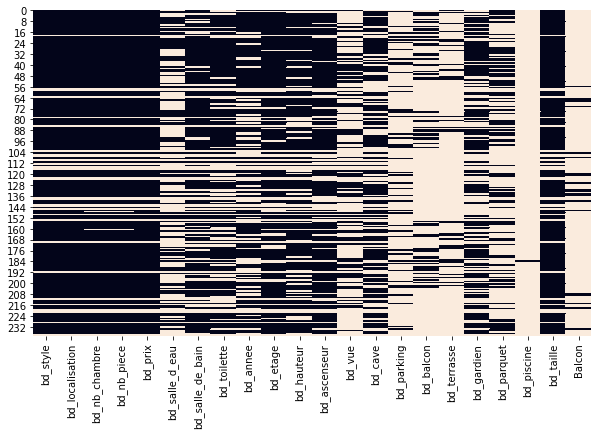

In [34]:
def viz_na(data):
    return sns.heatmap(data.isna(), cbar=False)

viz_na(data)


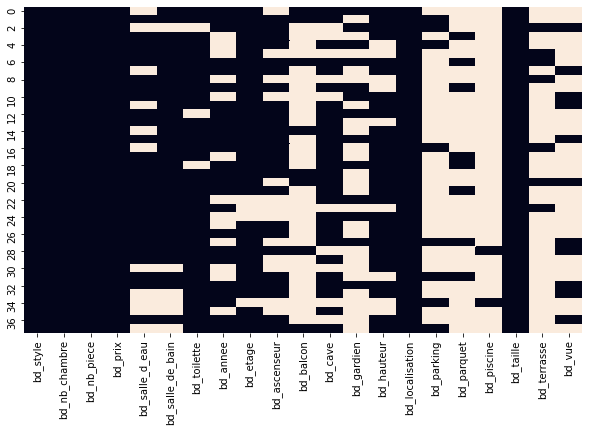

In [35]:
viz_na(df)

In [24]:
#missing data
def nan_description(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

nan_description(data)  

,Total,Percent
bd_travaux,239,1.000000
bd_exposition,239,1.000000
bd_jardin,239,1.000000
bd_vis_a_vis,239,1.000000
bd_cuisine,239,1.000000
bd_chemine,239,1.000000
bd_neuf,239,1.000000
bd_piscine,238,0.995816
Balcon,217,0.907950
bd_terrasse,205,0.857741


In [25]:
nan_description(data)  

,Total,Percent
bd_travaux,239,1.000000
bd_exposition,239,1.000000
bd_jardin,239,1.000000
bd_vis_a_vis,239,1.000000
bd_cuisine,239,1.000000
bd_chemine,239,1.000000
bd_neuf,239,1.000000
bd_piscine,238,0.995816
Balcon,217,0.907950
bd_terrasse,205,0.857741


In [26]:
data = data.drop(["bd_travaux","bd_exposition", "bd_jardin","bd_vis_a_vis", "bd_cuisine","bd_chemine","bd_neuf","bd_paragraphe"], axis=1 )
df = df.drop(["bd_travaux","bd_exposition", "bd_jardin","bd_vis_a_vis", "bd_cuisine","bd_chemine","bd_neuf","bd_paragraphe"], axis=1)

# Non_numeric features

In [27]:
categoricals_paris = data.select_dtypes(exclude = [np.number])
categoricals_paris.describe()

,bd_style,bd_localisation,bd_nb_chambre,bd_nb_piece,bd_prix,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,bd_etage,...,bd_vue,bd_cave,bd_parking,bd_balcon,bd_terrasse,bd_gardien,bd_parquet,bd_piscine,bd_taille,Balcon
count,206,206,204,204,206,98,171,159,151,183,...,90,146,46,57,34,141,94,1,206,22
unique,4,1,7,11,178,4,5,7,52,9,...,1,5,1,1,1,1,1,1,130,1
top,Appartement,Paris 16ème,3 Chambres,5 Pièces,2 100 000 €\nLes honoraires sont à la charge d...,1 Salle d'eau,1 Salle de bain,1 Toilette,Année de construction 1900,Au 4ème étage,...,Belle vue,Cave,Parking,Balcon,Terrasse,Gardien,Parquet,Piscine,['150 M²'],Balcon
freq,187,206,68,50,4,73,92,58,41,36,...,90,142,46,57,34,141,94,1,7,22


In [28]:
categoricals_lyon = df.select_dtypes(exclude = [np.number])
categoricals_lyon.describe()

,bd_style,bd_nb_chambre,bd_nb_piece,bd_prix,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,bd_etage,bd_ascenseur,...,bd_cave,bd_gardien,bd_hauteur,bd_localisation,bd_parking,bd_parquet,bd_piscine,bd_taille,bd_terrasse,bd_vue
count,38,38,38,38,27,32,35,25,34,25,...,28,13,29,38,8,8,2,38,7,11
unique,4,3,5,31,2,5,3,18,7,1,...,4,1,7,1,1,1,1,31,1,1
top,Appartement,3 Chambres,5 Pièces,1 550 000 €\nLes honoraires sont à la charge d...,1 Salle d'eau,1 Salle de bain,2 Toilettes,Année de construction 1900,Au 2ème étage,Ascenseur,...,Cave,Gardien,Bâtiment de 5 étages,Lyon 6ème,Parking,Parquet,Piscine,['183 M²'],Terrasse,Belle vue
freq,34,19,16,3,24,21,16,3,9,25,...,25,13,8,38,8,8,2,3,7,11


**Convert String Column to Numeric**

In [41]:
cols = ['bd_nb_chambre', 'bd_salle_d_eau', 'bd_salle_de_bain', 'bd_toilette', 'bd_annee', 
        'bd_hauteur', 'bd_parking','bd_terrasse', 'bd_etage', 'bd_nb_piece', 'bd_taille']


for col in cols:
    data[col] = data[col].str.replace('\D+', '', regex = True)
    df[col] = df[col].str.replace('\D+', '', regex = True)
    

for col in cols:  # Iterate over chosen columns
    data[col] = pd.to_numeric(data[col])
    df[col] = pd.to_numeric(df[col])


In [57]:
#data.info()
#df.info()
#data.bd_taille
#df.bd_taille

In [116]:
# Test d'extraction de prix

bd_prix_test = df.bd_prix.copy()
#bd_prix_test
res = [re.findall(r'^([\d ]*€){1}', bd_prix_test[i]) for i in range(len(bd_prix_test))]
print(res)

[['795 000 €'], ['850 000 €'], ['1 450 000 €'], ['890 000 €'], ['1 550 000 €'], ['910 000 €'], ['1 495 000 €'], ['1 050 000 €'], ['910 000 €'], ['690 000 €'], ['1 560 000 €'], ['1 050 000 €'], ['1 550 000 €'], ['1 370 000 €'], [], ['1 230 000 €'], ['895 000 €'], ['1 050 000 €'], ['1 550 000 €'], ['870 000 €'], ['1 700 000 €'], [], ['800 000 €'], ['910 000 €'], ['800 000 €'], ['660 000 €'], ['1 030 000 €'], ['2 800 000 €'], ['1 350 000 €'], ['649 000 €'], ['558 000 €'], ['1 080 000 €'], ['1 560 000 €'], ['565 000 €'], ['2 250 000 €'], ['570 000 €'], ['1 890 000 €'], ['590 000 €']]


In [204]:
# Extraction de prix

def extract_price(df, cols):
    res = [re.findall(r'^([\d ]*€){1}', cols[i]) for i in range(len(cols))]
    df['prix'] = res
    res2 = [re.findall(r'[\d* ]{2,}', df['prix'].apply(str)[i]) for i in range(len(df['prix'].apply(str)))]
    df['prix'] = res2
    res3 = [re.sub('\s+','',df['prix'].apply(str)[i]) for i in range(len(df['prix'].apply(str)))]
    df['prix'] = res3
    df['prix'] = df['prix'] .str.replace('\D+', '', regex = True)
    df['prix'] = pd.to_numeric(df['prix'])

extract_price(df, df.bd_prix)
extract_price(data, data.bd_prix.apply(str))
df.prix

0      795000.0
1      850000.0
2     1450000.0
3      890000.0
4     1550000.0
5      910000.0
6     1495000.0
7     1050000.0
8      910000.0
9      690000.0
10    1560000.0
11    1050000.0
12    1550000.0
13    1370000.0
14          NaN
15    1230000.0
16     895000.0
17    1050000.0
18    1550000.0
19     870000.0
20    1700000.0
21          NaN
22     800000.0
23     910000.0
24     800000.0
25     660000.0
26    1030000.0
27    2800000.0
28    1350000.0
29     649000.0
30     558000.0
31    1080000.0
32    1560000.0
33     565000.0
34    2250000.0
35     570000.0
36    1890000.0
37     590000.0
Name: prix, dtype: float64

In [205]:
df

,bd_style,bd_nb_chambre,bd_nb_piece,bd_prix,bd_salle_d_eau,bd_salle_de_bain,bd_toilette,bd_annee,bd_etage,bd_ascenseur,...,bd_gardien,bd_hauteur,bd_localisation,bd_parking,bd_parquet,bd_piscine,bd_taille,bd_terrasse,bd_vue,prix
0,Appartement,3,4,795 000 €\nLes honoraires sont à la charge du ...,NaN,1.0,1.0,1965.0,4.0,NaN,...,Gardien,5.0,Lyon 6ème,NaN,NaN,NaN,106,NaN,NaN,795000.0
1,Appartement,3,4,850 000 €\nLes honoraires sont à la charge du ...,1.0,1.0,2.0,2000.0,3.0,Ascenseur,...,NaN,7.0,Lyon 6ème,NaN,NaN,NaN,110,NaN,NaN,850000.0
2,Appartement,4,5,1 450 000 €\nLes honoraires sont à la charge d...,NaN,NaN,NaN,1982.0,3.0,Ascenseur,...,Gardien,3.0,Lyon 6ème,NaN,NaN,NaN,130,NaN,Belle vue,1450000.0
3,Duplex,3,5,890 000 €\nLes honoraires sont à la charge du ...,1.0,1.0,2.0,NaN,4.0,Ascenseur,...,NaN,5.0,Lyon 6ème,NaN,Parquet,NaN,120,NaN,NaN,890000.0
4,Appartement,3,6,1 550 000 €\nLes honoraires sont à la charge d...,1.0,1.0,1.0,NaN,1.0,Ascenseur,...,Gardien,NaN,Lyon 6ème,NaN,NaN,NaN,183,NaN,NaN,1550000.0
5,Triplex,4,5,910 000 €\nLes honoraires sont à la charge du ...,1.0,1.0,3.0,NaN,3.0,NaN,...,NaN,NaN,Lyon 6ème,NaN,NaN,NaN,136,NaN,NaN,910000.0
6,Appartement,4,6,1 495 000 €\nLes honoraires sont à la charge d...,2.0,2.0,2.0,1965.0,1.0,Ascenseur,...,Gardien,5.0,Lyon 6ème,NaN,Parquet,NaN,231,NaN,NaN,1495000.0
7,Appartement,4,6,1 050 000 €\nLes honoraires sont à la charge d...,NaN,3.0,2.0,1970.0,6.0,Ascenseur,...,NaN,6.0,Lyon 6ème,NaN,NaN,NaN,168,NaN,Belle vue,1050000.0
8,Triplex,4,5,910 000 €\nLes honoraires sont à la charge du ...,1.0,1.0,3.0,NaN,3.0,NaN,...,NaN,NaN,Lyon 6ème,NaN,NaN,NaN,136,NaN,NaN,910000.0
9,Appartement,3,4,690 000 €\nLes honoraires sont à la charge du ...,1.0,1.0,1.0,1900.0,4.0,Ascenseur,...,Gardien,NaN,Lyon 6ème,NaN,Parquet,NaN,88,NaN,NaN,690000.0


# Relation between target and features

# Missing data : Interpolation 
consiste à localiser la valeure la plus proche et à lui affecter la même valeur
Remplace missing value by an average value 

# RMSE

# Cross-validation et gridsearch


# Prediction Prix